## Data  개요

**소상공인시장진흥공단_상가(상권)정보**

- 영업 중인 전국 상가업소 데이터를 제공
- (상호명, 업종코드, 업종명, 지번주소, 도로명주소, 경도, 위도 등)

- 공공 데이터 포털 
https://www.data.go.kr/data/15083033/fileData.do

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)
pd.options.display.max_columns = 39

## Step 1: 질문하기 (Ask questions)
데이터가 주어진 상태에서 질문을 할 수도 있고, 질문에 답할 수 있는 데이터를 수집할 수도 있다.

**예시**

- (1) 서초구에는 어떤 음식점 업종이 많을까?
- (2) 구별 음식점 업종 분포는 어떻게 다를까?
- (3) 어느 구에 학원수가 많을까?
- (4) 구별 학원 분포는 어떻게 다를까?
- (5) 관심 동네 비교해보기

## Step 2: 데이터 랭글링 (Wrangle data)
- 데이터 랭글링 : 원자료(raw data)를 보다 쉽게 접근하고 분석할 수 있도록 데이터를 정리하고 통합하는 과정
(참고. 위키피디아)
- 세부적으로는 데이터의 수집(gather), 평가(assess), 정제(clean) 작업으로 나눌 수 있다.

### 2.1 수집(gather)

In [3]:
df = pd.read_csv('./dataset/소상공인시장진흥공단_상가(상권)정보_서울_202209.csv')

In [4]:
df.head(5)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,23324279,제중건강원,NaN,D,소매,D10,건강/미용식품,D10A07,건강원,G47216,건강보조식품 소매업,11,서울특별시,11560,영등포구,1156053500,영등포동,1156010600,영등포동5가,1156010600100410001,1,대지,41,1.0,서울특별시 영등포구 영등포동5가 41-1,115604154799,서울특별시 영등포구 영중로14길,11,17.0,1156010600100410002034626,NaN,"서울특별시 영등포구 영중로14길 11-17, (영등포동5가)",150030,7250,NaN,1,NaN,126.907168,37.520613
1,24525909,민속악기사,NaN,D,소매,D04,취미/오락관련소매,D04A09,악기판매,G47593,악기 소매업,11,서울특별시,11200,성동구,1120079000,용답동,1120012200,용답동,1120012200101420011,1,대지,142,11.0,서울특별시 성동구 용답동 142-11,112004109480,서울특별시 성동구 용답5길,2,NaN,1120012200101420011000227,NaN,"서울특별시 성동구 용답5길 2, (용답동)",133849,4803,NaN,NaN,NaN,127.049018,37.566857
2,24715368,태평양진주,NaN,D,소매,D26,시계/귀금속소매,D26A01,시계/귀금속,G47830,시계 및 귀금속 소매업,11,서울특별시,11110,종로구,1111061500,종로1.2.3.4가동,1111015200,봉익동,1111015200100430001,1,대지,43,1.0,서울특별시 종로구 봉익동 43-1,111104100163,서울특별시 종로구 서순라길,17,10.0,1111015200100440000000001,금사랑투빌딩,"서울특별시 종로구 서순라길 17-10, (봉익동)",110390,3138,NaN,NaN,NaN,126.993530,37.571848
3,15554136,김선희꼼꼼국어교습소,NaN,R,학문/교육,R01,학원-보습교습입시,R01A01,학원-입시,P85501,일반 교과 학원,11,서울특별시,11710,송파구,1171056100,방이1동,1171011100,방이동,1171011100101970003,1,대지,197,3.0,서울특별시 송파구 방이동 197-3,117104169448,서울특별시 송파구 위례성대로12길,31,NaN,1171011100101970003017195,NaN,"서울특별시 송파구 위례성대로12길 31, (방이동)",138834,5640,NaN,2,NaN,127.121520,37.510967
4,17174175,비지트,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11650,서초구,1165062100,방배4동,1165010100,방배동,1165010100108540018,1,대지,854,18.0,서울특별시 서초구 방배동 854-18,116504163117,서울특별시 서초구 동광로18길,82,NaN,1165010100108540018009586,상랑의빌딩,"서울특별시 서초구 동광로18길 82, (방배동)",137837,6572,NaN,1,NaN,126.991394,37.488375


In [53]:
df.head().T

,0,1,2,3,4
상호명,제중건강원,민속악기사,태평양진주,김선희꼼꼼국어교습소,비지트
상권업종대분류명,소매,소매,소매,학문/교육,음식
상권업종중분류명,건강/미용식품,취미/오락관련소매,시계/귀금속소매,학원-보습교습입시,한식
상권업종소분류명,건강원,악기판매,시계/귀금속,학원-입시,한식/백반/한정식
시도명,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시
시군구명,영등포구,성동구,종로구,송파구,서초구
행정동명,영등포동,용답동,종로1.2.3.4가동,방이1동,방배4동
법정동명,영등포동5가,용답동,봉익동,방이동,방배동
대지구분명,대지,대지,대지,대지,대지
지번본번지,41,142,43,197,854


### 2.2 평가(assess)

**샘플의 개수**, **컬럼의 개수**

In [6]:
df.count(0)

상가업소번호       361490
상호명          361490
지점명           61624
상권업종대분류코드    361490
상권업종대분류명     361490
상권업종중분류코드    361490
상권업종중분류명     361490
상권업종소분류코드    361490
상권업종소분류명     361490
표준산업분류코드     336942
표준산업분류명      336942
시도코드         361490
시도명          361490
시군구코드        361490
시군구명         361490
행정동코드        361490
행정동명         361490
법정동코드        361490
법정동명         361490
지번코드         361490
대지구분코드       361490
대지구분명        361490
지번본번지        361490
지번부번지        286583
지번주소         361490
도로명코드        361490
도로명          361490
건물본번지        361490
건물부번지         48289
건물관리번호       361490
건물명          179097
도로명주소        361490
구우편번호        361490
신우편번호        361490
동정보           41048
층정보          221085
호정보               0
경도           361490
위도           361490
dtype: int64

In [54]:
df.index

RangeIndex(start=0, stop=361490, step=1)

**인덱스 정보 보기**

In [12]:
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드           int64
시도명           object
시군구코드          int64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드          int64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호          int64
신우편번호          int64
동정보           object
층정보           object
호정보          float64
경도           float64
위도           float64
dtype: object

**컬럼 정보 보기**

In [5]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

**요약 정보 보기**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361490 entries, 0 to 361489
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     361490 non-null  int64  
 1   상호명        361490 non-null  object 
 2   지점명        61624 non-null   object 
 3   상권업종대분류코드  361490 non-null  object 
 4   상권업종대분류명   361490 non-null  object 
 5   상권업종중분류코드  361490 non-null  object 
 6   상권업종중분류명   361490 non-null  object 
 7   상권업종소분류코드  361490 non-null  object 
 8   상권업종소분류명   361490 non-null  object 
 9   표준산업분류코드   336942 non-null  object 
 10  표준산업분류명    336942 non-null  object 
 11  시도코드       361490 non-null  int64  
 12  시도명        361490 non-null  object 
 13  시군구코드      361490 non-null  int64  
 14  시군구명       361490 non-null  object 
 15  행정동코드      361490 non-null  int64  
 16  행정동명       361490 non-null  object 
 17  법정동코드      361490 non-null  int64  
 18  법정동명       361490 non-null  object 
 19  지번코드       361490 non-n

**누락 데이터 확인**

In [56]:
null_sum = df.isnull().sum()
null_sum

상호명         0
상권업종대분류명    0
상권업종중분류명    0
상권업종소분류명    0
시도명         0
시군구명        0
행정동명        0
법정동명        0
대지구분명       0
지번본번지       0
지번주소        0
도로명         0
건물본번지       0
도로명주소       0
경도          0
위도          0
dtype: int64

<AxesSubplot:>

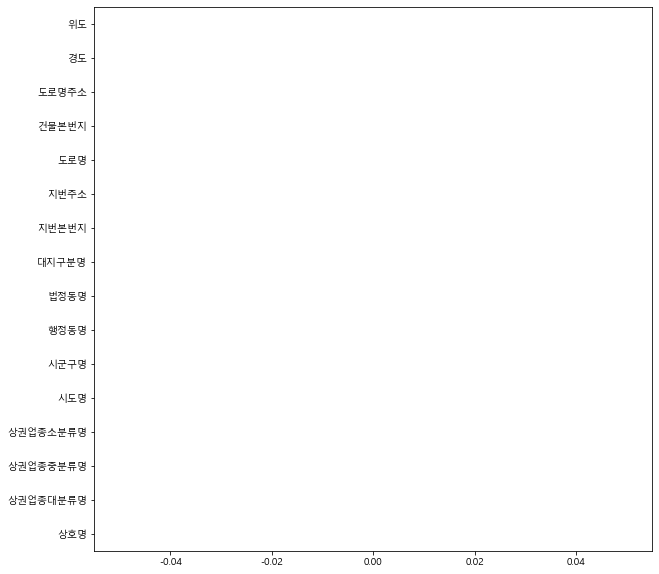

In [57]:
null_sum.plot(kind='barh', figsize=(10, 10))

<AxesSubplot:>

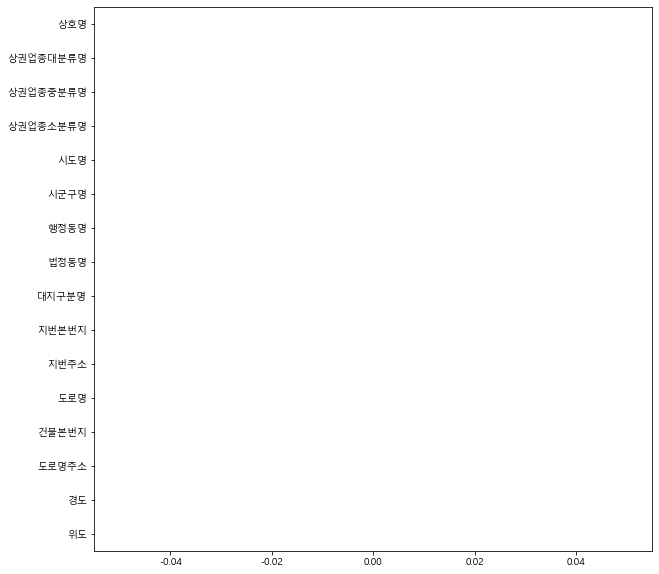

In [58]:
plt.figure(figsize=(10, 10))
sns.barplot(y=null_sum.index, x=null_sum.values)

### 2.3 정제(clean)

**누락 데이터가 많은 컬럼 삭제**

In [6]:
df = df.dropna(axis=1)

In [59]:
not_use = null_sum.sort_values(ascending=False).head(9)
not_use_col = not_use.index
not_use_col

Index(['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', '시도명', '시군구명', '행정동명',
       '법정동명', '대지구분명'],
      dtype='object')

In [ ]:
df = df.drop(not_use_col, axis=1)

In [7]:
df.isnull().sum()

상가업소번호       361490
상호명          361490
상권업종대분류코드    361490
상권업종대분류명     361490
상권업종중분류코드    361490
상권업종중분류명     361490
상권업종소분류코드    361490
상권업종소분류명     361490
시도코드         361490
시도명          361490
시군구코드        361490
시군구명         361490
행정동코드        361490
행정동명         361490
법정동코드        361490
법정동명         361490
지번코드         361490
대지구분코드       361490
대지구분명        361490
지번본번지        361490
지번주소         361490
도로명코드        361490
도로명          361490
건물본번지        361490
건물관리번호       361490
도로명주소        361490
구우편번호        361490
신우편번호        361490
경도           361490
위도           361490
dtype: int64

**컬럼명에 "코드" 또는 "번호"가 들어간 컬럼 삭제**

In [8]:
cols = [c for c in df.columns if c[-2:] == '코드']
df.drop(cols, axis=1, inplace=True)

cols2 = [c for c in df.columns if c[-2:] == '번호']
df.drop(cols2, axis=1, inplace=True)
df.head()

df.columns.str.contains("코드")
code_cols = df.columns[df.columns.str.contains("코드")]
code_cols
df = df.drop(code_cols, axis=1)

num_cols = df.columns[df.columns.str.contains("번호")]
num_cols
df = df.drop(num_cols, axis=1)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,제중건강원,소매,건강/미용식품,건강원,서울특별시,영등포구,영등포동,영등포동5가,대지,41,서울특별시 영등포구 영등포동5가 41-1,서울특별시 영등포구 영중로14길,11,"서울특별시 영등포구 영중로14길 11-17, (영등포동5가)",126.907168,37.520613
1,민속악기사,소매,취미/오락관련소매,악기판매,서울특별시,성동구,용답동,용답동,대지,142,서울특별시 성동구 용답동 142-11,서울특별시 성동구 용답5길,2,"서울특별시 성동구 용답5길 2, (용답동)",127.049018,37.566857
2,태평양진주,소매,시계/귀금속소매,시계/귀금속,서울특별시,종로구,종로1.2.3.4가동,봉익동,대지,43,서울특별시 종로구 봉익동 43-1,서울특별시 종로구 서순라길,17,"서울특별시 종로구 서순라길 17-10, (봉익동)",126.993530,37.571848
3,김선희꼼꼼국어교습소,학문/교육,학원-보습교습입시,학원-입시,서울특별시,송파구,방이1동,방이동,대지,197,서울특별시 송파구 방이동 197-3,서울특별시 송파구 위례성대로12길,31,"서울특별시 송파구 위례성대로12길 31, (방이동)",127.121520,37.510967
4,비지트,음식,한식,한식/백반/한정식,서울특별시,서초구,방배4동,방배동,대지,854,서울특별시 서초구 방배동 854-18,서울특별시 서초구 동광로18길,82,"서울특별시 서초구 동광로18길 82, (방배동)",126.991394,37.488375


## Step 3: 데이터 탐색 (Exploratory Data Analysis)
데이터의 패턴을 찾고, 관계를 시각화 하는 작업 등으로 통해 데이터에 대한 직관을 극대화 한다.

**기술 통계 요약**

In [12]:
df.describe()

,지번본번지,건물본번지,경도,위도
count,361490.000000,361490.000000,361490.000000,361490.000000
mean,422.386384,139.732366,126.993759,37.544906
std,426.373510,259.077055,0.083937,0.049022
min,1.000000,1.000000,126.768169,37.434081
25%,102.000000,19.000000,126.922367,37.504588
50%,301.000000,46.000000,127.009557,37.542195
75%,644.000000,154.000000,127.056107,37.572518
max,9999.000000,3581.000000,127.182588,37.690787


In [60]:
df.describe(include="object")

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소
count,361490,361490,361490,361490,361490,361490,361490,361490,361490,361490,361490,361490
unique,263524,8,89,677,1,25,425,463,2,134165,12408,133359
top,CU,음식,한식,한식/백반/한정식,서울특별시,강남구,역삼1동,역삼동,대지,서울특별시 종로구 종로6가 262-1,서울특별시 종로구 종로,"서울특별시 종로구 종로 266, (종로6가)"
freq,1702,121534,39624,29155,361490,35511,6628,8292,361232,892,2263,898


### 3.1 히스토그램으로 수치 데이터의 분포 한눈에 확인하기
- **히스토그램(histogram)** : 수치형 데이터의 구간별 빈도수를 나타내는 그래프

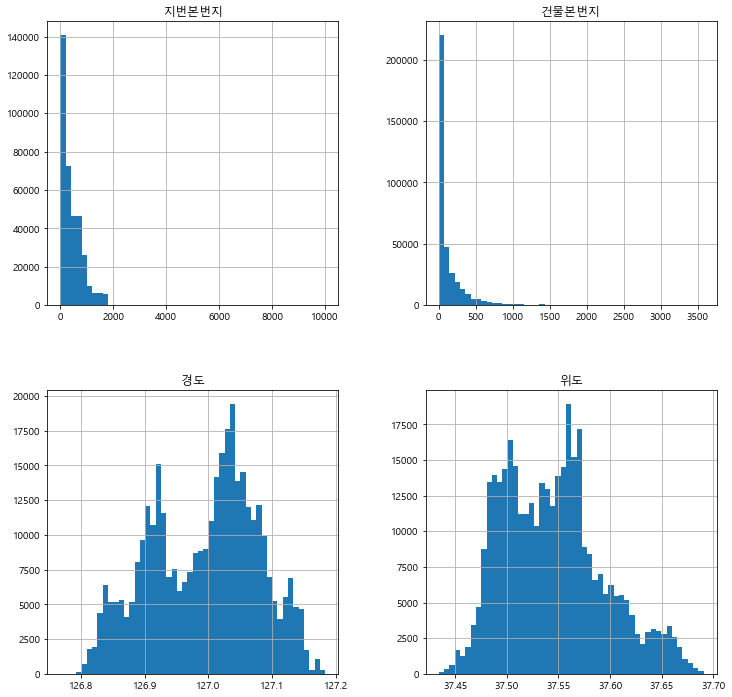

In [61]:
h = df.hist(figsize=(12, 12), bins=50)

### 3.2 상관 계수로 두 변량간의 관계 파악하기

In [62]:
corr = df.corr()

In [23]:
df[["위도", "경도"]].describe()

,위도,경도
count,361490.000000,361490.000000
mean,37.544906,126.993759
std,0.049022,0.083937
min,37.434081,126.768169
25%,37.504588,126.922367
50%,37.542195,127.009557
75%,37.572518,127.056107
max,37.690787,127.182588


<AxesSubplot:>

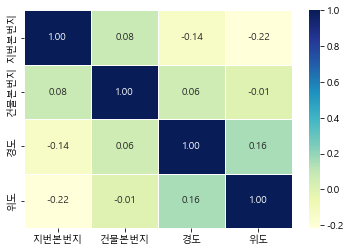

In [63]:
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, cmap='YlGnBu')

In [24]:
df[["위도", "경도"]].corr()

,위도,경도
위도,1.00000,0.15501
경도,0.15501,1.00000


In [ ]:
df_corr = df.corr()
sns.heatmap(df_corr, cmap='Reds', annot=True)

<AxesSubplot:xlabel='경도', ylabel='위도'>

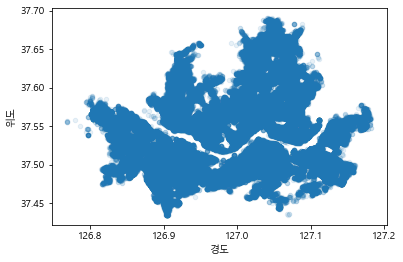

In [64]:
df.plot(x='경도',y='위도', kind='scatter', alpha=0.1)

<AxesSubplot:xlabel='경도', ylabel='위도'>

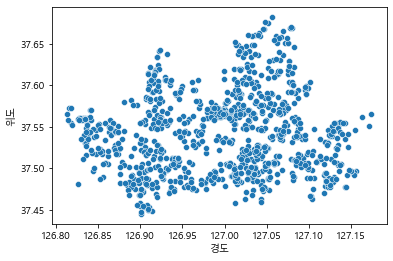

In [27]:
sns.scatterplot(data=df.sample(1000), x="경도", y="위도")

* [컬러맵 정보](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

### 3.3 문자열 데이터에 대한 요약

- 상권업종대분류명 요약

In [16]:
df['상권업종대분류명'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 361490 entries, 0 to 361489
Series name: 상권업종대분류명
Non-Null Count   Dtype 
--------------   ----- 
361490 non-null  object
dtypes: object(1)
memory usage: 2.8+ MB


In [28]:
df['상권업종대분류명'].describe()

count     361490
unique         8
top           음식
freq      121534
Name: 상권업종대분류명, dtype: object

- 상권업종대분류명 의 unique 값

In [17]:
df['상권업종대분류명'].unique()

array(['소매', '학문/교육', '음식', '부동산', '생활서비스', '관광/여가/오락', '숙박', '스포츠'],
      dtype=object)

- 상권업종대분류명 의 unique 값의 갯수

In [21]:
df['상권업종대분류명'].nunique()

8

- 상권업종대분류명 의 최빈값

In [65]:
df["상권업종대분류명"].mode()

0    음식
Name: 상권업종대분류명, dtype: object

- 상권업종대분류명 의 빈도수

In [30]:
df["상권업종대분류명"].value_counts()

음식          121534
소매          103889
생활서비스        74450
학문/교육        26193
부동산          18600
관광/여가/오락      9167
스포츠           5290
숙박            2367
Name: 상권업종대분류명, dtype: int64

In [29]:
df.describe(include="object")

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소
count,361490,361490,361490,361490,361490,361490,361490,361490,361490,361490,361490,361490
unique,263524,8,89,677,1,25,425,463,2,134165,12408,133359
top,CU,음식,한식,한식/백반/한정식,서울특별시,강남구,역삼1동,역삼동,대지,서울특별시 종로구 종로6가 262-1,서울특별시 종로구 종로,"서울특별시 종로구 종로 266, (종로6가)"
freq,1702,121534,39624,29155,361490,35511,6628,8292,361232,892,2263,898


### 3.4 구별 음식점 업종 비교하기

#### (1) 서초구에는 어떤 음식점 업종이 많을까?

- 서초구에서 상권업종대분류명이 음식인 데이터만 가져오기

In [67]:
seocho_food = df[(df["시군구명"] == "서초구") & 
   (df["상권업종대분류명"] == "음식")]
seocho_food.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
4,비지트,음식,한식,한식/백반/한정식,서울특별시,서초구,방배4동,방배동,대지,854,서울특별시 서초구 방배동 854-18,서울특별시 서초구 동광로18길,82,"서울특별시 서초구 동광로18길 82, (방배동)",126.991394,37.488375
6,다향,음식,한식,한식/백반/한정식,서울특별시,서초구,서초3동,서초동,대지,1485,서울특별시 서초구 서초동 1485-3,서울특별시 서초구 효령로,230,"서울특별시 서초구 효령로 230, (서초동)",127.009382,37.483436
24,장수식당,음식,한식,한식/백반/한정식,서울특별시,서초구,잠원동,잠원동,대지,29,서울특별시 서초구 잠원동 29-3,서울특별시 서초구 강남대로95길,17,"서울특별시 서초구 강남대로95길 17, (잠원동)",127.018983,37.513638
32,북경깐풍기,음식,중식,중국음식/중국집,서울특별시,서초구,서초4동,서초동,대지,1307,서울특별시 서초구 서초동 1307-18,서울특별시 서초구 강남대로65길,7,"서울특별시 서초구 강남대로65길 7, (서초동)",127.025310,37.500247
60,라이브존레스토랑,음식,양식,패밀리레스토랑,서울특별시,서초구,반포4동,반포동,대지,83,서울특별시 서초구 반포동 83-16,서울특별시 서초구 동광로49길,7,"서울특별시 서초구 동광로49길 7, (반포동)",127.001978,37.493519


In [68]:
seocho_food['상권업종중분류명'].value_counts()

한식         1966
커피점/카페     1205
분식          520
유흥주점        452
일식/수산물      449
양식          407
패스트푸드       277
제과제빵떡케익     260
닭/오리요리      213
중식          183
별식/퓨전요리     141
기타음식업        23
부페           17
음식배달서비스       5
Name: 상권업종중분류명, dtype: int64

<AxesSubplot:>

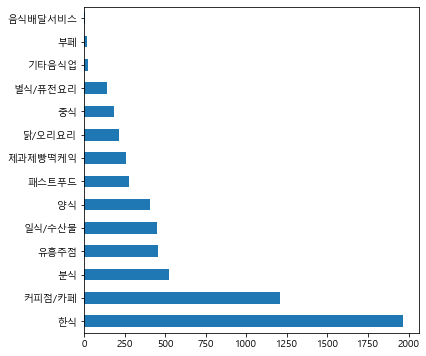

In [70]:
seocho_food['상권업종중분류명'].value_counts().plot(kind='barh', figsize=(6,6))

**분석결과** : 서초구에는 한식, 카페, 분식 순으로 상권이 분포한다

#### (2) 구별 업종(상권업종중분류명 기준)  분포 비교하기

- 상권업종대분류명 이 음식인 데이터 준비

In [35]:
df_food = df[(df["시군구명"] == "서초구") & 
   (df["상권업종대분류명"] == "음식")]
df_food

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
4,비지트,음식,한식,한식/백반/한정식,서울특별시,서초구,방배4동,방배동,대지,854,서울특별시 서초구 방배동 854-18,서울특별시 서초구 동광로18길,82,"서울특별시 서초구 동광로18길 82, (방배동)",126.991394,37.488375
6,다향,음식,한식,한식/백반/한정식,서울특별시,서초구,서초3동,서초동,대지,1485,서울특별시 서초구 서초동 1485-3,서울특별시 서초구 효령로,230,"서울특별시 서초구 효령로 230, (서초동)",127.009382,37.483436
24,장수식당,음식,한식,한식/백반/한정식,서울특별시,서초구,잠원동,잠원동,대지,29,서울특별시 서초구 잠원동 29-3,서울특별시 서초구 강남대로95길,17,"서울특별시 서초구 강남대로95길 17, (잠원동)",127.018983,37.513638
32,북경깐풍기,음식,중식,중국음식/중국집,서울특별시,서초구,서초4동,서초동,대지,1307,서울특별시 서초구 서초동 1307-18,서울특별시 서초구 강남대로65길,7,"서울특별시 서초구 강남대로65길 7, (서초동)",127.025310,37.500247
60,라이브존레스토랑,음식,양식,패밀리레스토랑,서울특별시,서초구,반포4동,반포동,대지,83,서울특별시 서초구 반포동 83-16,서울특별시 서초구 동광로49길,7,"서울특별시 서초구 동광로49길 7, (반포동)",127.001978,37.493519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361185,마실,음식,유흥주점,꼬치구이전문점,서울특별시,서초구,반포1동,반포동,대지,705,서울특별시 서초구 반포동 705-7,서울특별시 서초구 신반포로,326,"서울특별시 서초구 신반포로 326-13, (반포동)",127.019767,37.509869
361258,커피앤와플타임,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,서초2동,서초동,대지,1360,서울특별시 서초구 서초동 1360-6,서울특별시 서초구 남부순환로347길,48,"서울특별시 서초구 남부순환로347길 48-7, (서초동)",127.031458,37.486619
361302,클립커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,반포1동,반포동,대지,705,서울특별시 서초구 반포동 705-7,서울특별시 서초구 신반포로,326,"서울특별시 서초구 신반포로 326-13, (반포동)",127.019767,37.509869
361304,서래셀부루,음식,유흥주점,룸살롱/단란주점,서울특별시,서초구,방배4동,방배동,대지,813,서울특별시 서초구 방배동 813-7,서울특별시 서초구 동광로,70,"서울특별시 서초구 동광로 70, (방배동)",126.990252,37.492591


- 시군구명, 상권업종중분류명 으로 그룹화 해서 상점수 개수 구하기

In [71]:
food_groupby = df_food.groupby(['시군구명', '상권업종중분류명'])['상호명'].count()
food_groupby

시군구명  상권업종중분류명
서초구   기타음식업         23
      닭/오리요리       213
      별식/퓨전요리      141
      부페            17
      분식           520
      양식           407
      유흥주점         452
      음식배달서비스        5
      일식/수산물       449
      제과제빵떡케익      260
      중식           183
      커피점/카페      1205
      패스트푸드        277
      한식          1966
Name: 상호명, dtype: int64

In [73]:
food = food_groupby.reset_index()
food = food.rename(columns={'상호명': '상호수'})
food

,시군구명,상권업종중분류명,상호수
0,서초구,기타음식업,23
1,서초구,닭/오리요리,213
2,서초구,별식/퓨전요리,141
3,서초구,부페,17
4,서초구,분식,520
5,서초구,양식,407
6,서초구,유흥주점,452
7,서초구,음식배달서비스,5
8,서초구,일식/수산물,449
9,서초구,제과제빵떡케익,260


- 전체 업종별 평균 시각화하기

In [52]:
tmp=df_food['상권업종중분류명']
tmp
#sns.barplot(data=df, x="상권업종중분류명", y=tmp)

4             한식
6             한식
24            한식
32            중식
60            양식
           ...  
361185      유흥주점
361258    커피점/카페
361302    커피점/카페
361304      유흥주점
361486        한식
Name: 상권업종중분류명, Length: 6118, dtype: object

<AxesSubplot:xlabel='상권업종중분류명', ylabel='상호수'>

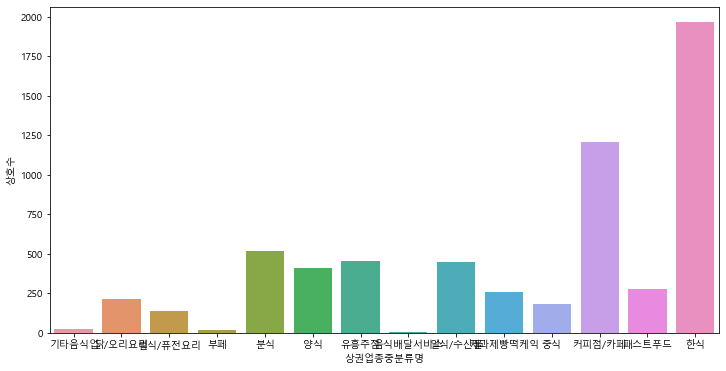

In [75]:
plt.figure(figsize=(12, 6))
sns.barplot(data=food, x='상권업종중분류명', y='상호수')

- 상권업종중분류명에 따른 상호수를 시각화하되 시군구명별로 모두 표시 (sns.catplot 이용)

**분석결과** : 

### 3.5 구별 학원수 비교하기

#### (1) 어느 구에 학원수가 많을까?

- 상권업종대분류명의 unique 값

In [41]:
df["상권업종대분류명"].unique()

array(['소매', '학문/교육', '음식', '부동산', '생활서비스', '관광/여가/오락', '숙박', '스포츠'],
      dtype=object)

- 상권업종대분류명이 학문/교육인 데이터 가져오기

In [43]:
df_academy = df[(df["상권업종대분류명"] == "학문/교육")]

- 시군구명으로 빈도수 구하기

In [44]:
df_academy['시군구명'].value_counts()

강남구     2586
송파구     1755
서초구     1699
양천구     1609
노원구     1495
강서구     1357
강동구     1341
은평구     1105
성북구     1102
마포구     1081
광진구     1059
관악구     1015
구로구     1010
동작구      998
영등포구     795
동대문구     779
중랑구      776
도봉구      759
서대문구     717
성동구      711
금천구      555
강북구      540
종로구      533
용산구      465
중구       351
Name: 시군구명, dtype: int64

- 빈도수 시각화하기

In [48]:
academy_count = df_academy["상권업종소분류명"].value_counts()
academy_count

학원-입시        4858
학원-외국어/어학    3372
학원(종합)       3220
학원-기타        2606
어린이집         2429
             ... 
학원-텔렉스/통신       1
학원-용접기술         1
학원-국가고시         1
학원-도배           1
학원-레크리에이션       1
Name: 상권업종소분류명, Length: 100, dtype: int64

<AxesSubplot:>

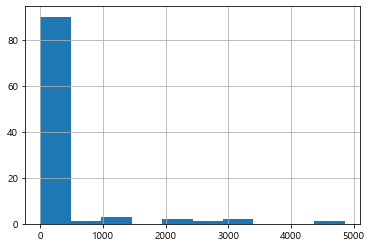

In [49]:
academy_count.hist()

**분석 결과** :

#### (2) 구별 학원의 세부 업종 (상권업종소분류명 기준) 분포 비교하기

- 상권업종소분류명으로 빈도수를 구하기

- 상권업종소분류명 빈도수 기준 상위 4개만 가져오기

- 위에서 구한 상위 4개 업종으로만 데이터 가져오기

- 상권업종소분류명, 시군구명으로 그룹화를 해서 빈도수 구하기

#### (3) 위치 정보 시각화하기

- 위에서 구한 데이터를 구별로 시각화

- 학원-입시 업종만 시각화

- 강남구에 대해서만 시각화

- 관심 동네 비교해보기